In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('LED.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [33]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [34]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [35]:
df['Alcohol']

0       0.01
1       0.01
2       0.01
3       0.01
4       0.01
        ... 
2933    4.36
2934    4.06
2935    4.43
2936    1.72
2937    1.68
Name: Alcohol, Length: 2938, dtype: float64

<AxesSubplot:>

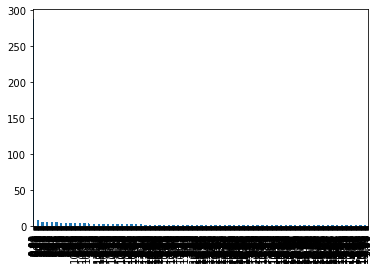

In [36]:
df['Alcohol'].value_counts().plot.bar()

<AxesSubplot:>

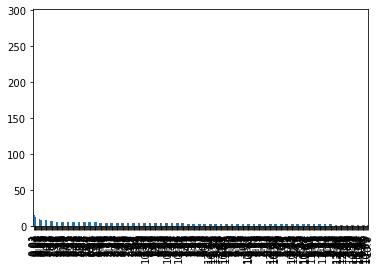

In [37]:
df['Alcohol'].value_counts()[:10].plot.bar()

<AxesSubplot:>

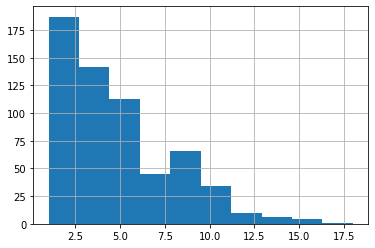

In [38]:
df[' BMI '].value_counts().hist()

<AxesSubplot:xlabel='Life expectancy ', ylabel=' BMI '>

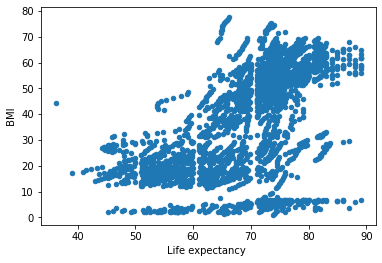

In [40]:
df.plot.scatter(x='Life expectancy ', y=' BMI ')

In [41]:
df_new = pd.read_csv('LED.csv', index_col='Life expectancy ' )

In [42]:
import phik
import seaborn as sns

<AxesSubplot:>

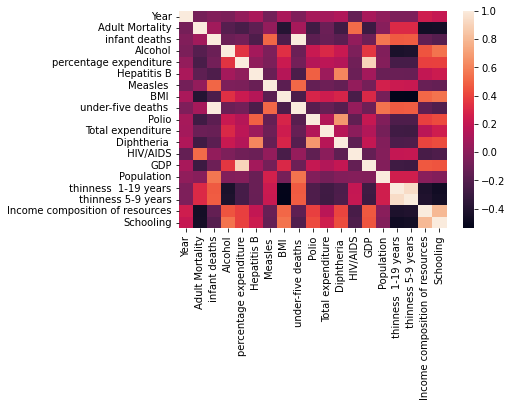

In [43]:
sns.heatmap(df_new.corr())

<AxesSubplot:>

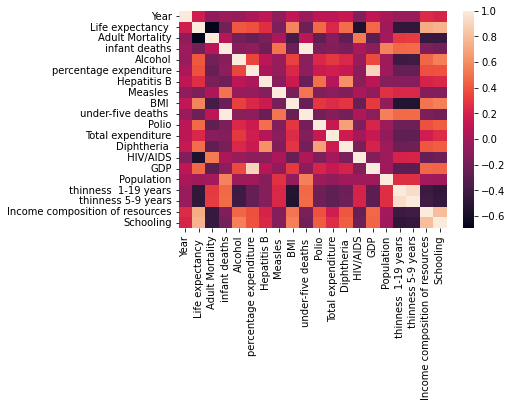

In [44]:
sns.heatmap(df.corr())

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
status_le = le.fit_transform(df['Status'])

print(status_le)
print(le.classes_)

[1 1 1 ... 1 1 1]
['Developed' 'Developing']


[  0   0   0 ... 192 192 192]
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Côte d'Ivoire" "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia

<AxesSubplot:>

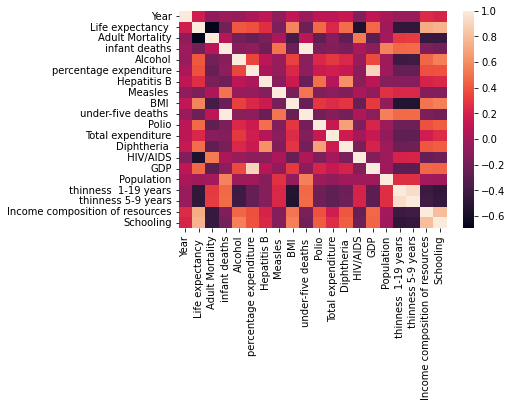

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
status_le = le.fit_transform(df['Country'])

print(status_le)
print(le.classes_)
sns.heatmap(df.corr())

In [51]:
pd.get_dummies(df['Country'])

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
one_hot_df = pd.concat([df.drop('Country', axis=1), pd.get_dummies(df['Country'], drop_first=True)],axis=1)
one_hot_df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,0,0,0,0,0,0,0,0,0,0
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,0,0,0,0,0,0,0,0,0,0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,0,0,0,0,0,0,0,0,0,0
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,0,0,0,0,0,0,0,0,0,0
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,0,0,0,0,0,0,0,0,0,1
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,0,0,0,0,0,0,0,0,0,1
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,0,0,0,0,0,0,0,0,0,1
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,0,0,0,0,0,0,0,0,0,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [60]:
new_df_2015 = df.drop(df[df['Year']<2015].index)
new_df_2015

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [69]:
new_df_2015 = new_df_2015.drop(' HIV/AIDS', axis=1)
new_df_2015

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,83,6.0,8.16,65.0,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,0,99.0,6.00,99.0,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,24,95.0,NaN,95.0,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,98,7.0,NaN,64.0,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,0,86.0,NaN,99.0,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,10,87.0,NaN,87.0,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,35,97.0,NaN,97.0,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,47,63.0,NaN,69.0,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,40,9.0,NaN,9.0,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [71]:
new_df_2015 = new_df_2015.drop('Status', axis=1)
new_df_2015

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,24,95.0,NaN,95.0,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,52.4,335.0,66,NaN,0.000000,64.0,118,23.3,98,7.0,NaN,64.0,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,0,86.0,NaN,99.0,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,74.1,157.0,9,NaN,0.000000,87.0,0,62.1,10,87.0,NaN,87.0,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,76.0,127.0,28,NaN,0.000000,97.0,256,17.5,35,97.0,NaN,97.0,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,65.7,224.0,37,NaN,0.000000,69.0,468,41.3,47,63.0,NaN,69.0,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,61.8,33.0,27,NaN,0.000000,9.0,9,23.4,40,9.0,NaN,9.0,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [72]:
new_df_2015 = new_df_2015.drop('infant deaths', axis=1)
new_df_2015

,Country,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,77.8,74.0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,75.6,19.0,NaN,0.000000,95.0,63,59.5,24,95.0,NaN,95.0,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,52.4,335.0,NaN,0.000000,64.0,118,23.3,98,7.0,NaN,64.0,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,76.4,13.0,NaN,0.000000,99.0,0,47.7,0,86.0,NaN,99.0,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,74.1,157.0,NaN,0.000000,87.0,0,62.1,10,87.0,NaN,87.0,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,76.0,127.0,NaN,0.000000,97.0,256,17.5,35,97.0,NaN,97.0,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,65.7,224.0,NaN,0.000000,69.0,468,41.3,47,63.0,NaN,69.0,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,61.8,33.0,NaN,0.000000,9.0,9,23.4,40,9.0,NaN,9.0,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [74]:
new_df_2015 = new_df_2015.drop('Measles ', axis=1)
new_df_2015

,Country,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,65.0,263.0,0.01,71.279624,65.0,19.1,83,6.0,8.16,65.0,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,77.8,74.0,4.60,364.975229,99.0,58.0,0,99.0,6.00,99.0,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,75.6,19.0,NaN,0.000000,95.0,59.5,24,95.0,NaN,95.0,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,52.4,335.0,NaN,0.000000,64.0,23.3,98,7.0,NaN,64.0,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,76.4,13.0,NaN,0.000000,99.0,47.7,0,86.0,NaN,99.0,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,74.1,157.0,NaN,0.000000,87.0,62.1,10,87.0,NaN,87.0,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,76.0,127.0,NaN,0.000000,97.0,17.5,35,97.0,NaN,97.0,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,65.7,224.0,NaN,0.000000,69.0,41.3,47,63.0,NaN,69.0,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,61.8,33.0,NaN,0.000000,9.0,23.4,40,9.0,NaN,9.0,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [75]:
new_df_2015 = new_df_2015.drop('Hepatitis B', axis=1)
new_df_2015

,Country,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,65.0,263.0,0.01,71.279624,19.1,83,6.0,8.16,65.0,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,77.8,74.0,4.60,364.975229,58.0,0,99.0,6.00,99.0,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,75.6,19.0,NaN,0.000000,59.5,24,95.0,NaN,95.0,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,52.4,335.0,NaN,0.000000,23.3,98,7.0,NaN,64.0,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,76.4,13.0,NaN,0.000000,47.7,0,86.0,NaN,99.0,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,74.1,157.0,NaN,0.000000,62.1,10,87.0,NaN,87.0,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,76.0,127.0,NaN,0.000000,17.5,35,97.0,NaN,97.0,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,65.7,224.0,NaN,0.000000,41.3,47,63.0,NaN,69.0,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,61.8,33.0,NaN,0.000000,23.4,40,9.0,NaN,9.0,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [77]:
new_df_2015 = new_df_2015.drop('under-five deaths ', axis=1)
new_df_2015

,Country,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,BMI,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,65.0,263.0,0.01,71.279624,19.1,6.0,8.16,65.0,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,77.8,74.0,4.60,364.975229,58.0,99.0,6.00,99.0,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,75.6,19.0,NaN,0.000000,59.5,95.0,NaN,95.0,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,52.4,335.0,NaN,0.000000,23.3,7.0,NaN,64.0,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,76.4,13.0,NaN,0.000000,47.7,86.0,NaN,99.0,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,74.1,157.0,NaN,0.000000,62.1,87.0,NaN,87.0,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,76.0,127.0,NaN,0.000000,17.5,97.0,NaN,97.0,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,65.7,224.0,NaN,0.000000,41.3,63.0,NaN,69.0,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,61.8,33.0,NaN,0.000000,23.4,9.0,NaN,9.0,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [78]:
new_df_2015 = new_df_2015.drop('Polio', axis=1)
new_df_2015

,Country,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,BMI,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,65.0,263.0,0.01,71.279624,19.1,8.16,65.0,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,77.8,74.0,4.60,364.975229,58.0,6.00,99.0,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,75.6,19.0,NaN,0.000000,59.5,NaN,95.0,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,52.4,335.0,NaN,0.000000,23.3,NaN,64.0,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,76.4,13.0,NaN,0.000000,47.7,NaN,99.0,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,74.1,157.0,NaN,0.000000,62.1,NaN,87.0,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,76.0,127.0,NaN,0.000000,17.5,NaN,97.0,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,65.7,224.0,NaN,0.000000,41.3,NaN,69.0,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,61.8,33.0,NaN,0.000000,23.4,NaN,9.0,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [83]:

new_df_2015.info

<bound method DataFrame.info of                                  Country  Year  Life expectancy   \
0                            Afghanistan  2015              65.0   
16                               Albania  2015              77.8   
32                               Algeria  2015              75.6   
48                                Angola  2015              52.4   
64                   Antigua and Barbuda  2015              76.4   
...                                  ...   ...               ...   
2858  Venezuela (Bolivarian Republic of)  2015              74.1   
2874                            Viet Nam  2015              76.0   
2890                               Yemen  2015              65.7   
2906                              Zambia  2015              61.8   
2922                            Zimbabwe  2015              67.0   

      Adult Mortality  Alcohol  percentage expenditure   BMI   \
0               263.0     0.01               71.279624   19.1   
16               74.0

In [84]:
new_df_2015.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality', 'Alcohol',
       'percentage expenditure', ' BMI ', 'Total expenditure', 'Diphtheria ',
       'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [89]:

new_df_2015 = new_df_2015.drop(' thinness  1-19 years', axis=1)


new_df_2015

,Country,Year,Life expectancy,Adult Mortality,Alcohol,BMI,GDP,Population,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,65.0,263.0,0.01,19.1,584.259210,33736494.0,17.3,0.479,10.1
16,Albania,2015,77.8,74.0,4.60,58.0,3954.227830,28873.0,1.3,0.762,14.2
32,Algeria,2015,75.6,19.0,NaN,59.5,4132.762920,39871528.0,5.8,0.743,14.4
48,Angola,2015,52.4,335.0,NaN,23.3,3695.793748,2785935.0,8.2,0.531,11.4
64,Antigua and Barbuda,2015,76.4,13.0,NaN,47.7,13566.954100,NaN,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,74.1,157.0,NaN,62.1,NaN,NaN,1.5,0.769,14.3
2874,Viet Nam,2015,76.0,127.0,NaN,17.5,NaN,NaN,14.5,0.678,12.6
2890,Yemen,2015,65.7,224.0,NaN,41.3,NaN,NaN,13.4,0.499,9.0
2906,Zambia,2015,61.8,33.0,NaN,23.4,1313.889646,161587.0,6.1,0.576,12.5


In [90]:
new_df_2015.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality', 'Alcohol',
       ' BMI ', 'GDP', 'Population', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [91]:
new_df_2015 = new_df_2015.drop('Population', axis=1)

In [92]:
new_df_2015 = new_df_2015.drop(' thinness 5-9 years', axis=1)

In [93]:
new_df_2015

,Country,Year,Life expectancy,Adult Mortality,Alcohol,BMI,GDP,Income composition of resources,Schooling
0,Afghanistan,2015,65.0,263.0,0.01,19.1,584.259210,0.479,10.1
16,Albania,2015,77.8,74.0,4.60,58.0,3954.227830,0.762,14.2
32,Algeria,2015,75.6,19.0,NaN,59.5,4132.762920,0.743,14.4
48,Angola,2015,52.4,335.0,NaN,23.3,3695.793748,0.531,11.4
64,Antigua and Barbuda,2015,76.4,13.0,NaN,47.7,13566.954100,0.784,13.9
...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,74.1,157.0,NaN,62.1,NaN,0.769,14.3
2874,Viet Nam,2015,76.0,127.0,NaN,17.5,NaN,0.678,12.6
2890,Yemen,2015,65.7,224.0,NaN,41.3,NaN,0.499,9.0
2906,Zambia,2015,61.8,33.0,NaN,23.4,1313.889646,0.576,12.5


<AxesSubplot:ylabel='Frequency'>

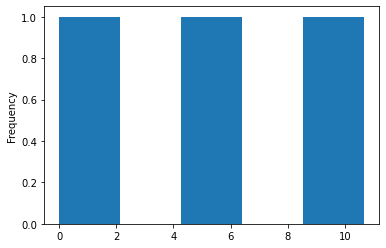

In [96]:
new_df_2015['Alcohol'].plot.hist()

In [100]:
new_df = new_df_2015(index_column='Country')

TypeError: 'DataFrame' object is not callable

In [103]:
new_df_2015.to_csv('prepped_LED.csv')

In [104]:
df = pd.read_excel('prepped_LED.csv')
df

ValueError: Excel file format cannot be determined, you must specify an engine manually.

<AxesSubplot:>

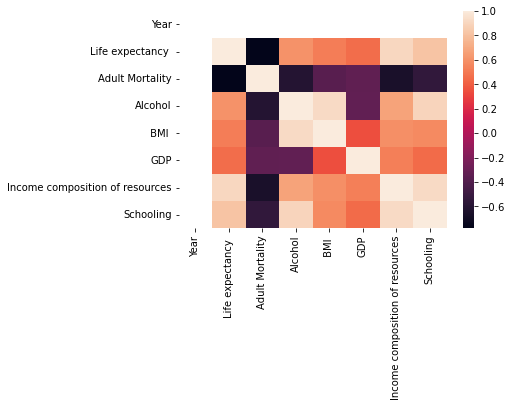

In [105]:
sns.heatmap(new_df_2015.corr())

<AxesSubplot:xlabel='Life expectancy ', ylabel='GDP'>

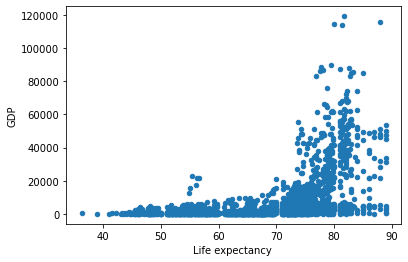

In [106]:
df.plot.scatter(x='Life expectancy ', y='GDP')

<AxesSubplot:xlabel='Life expectancy ', ylabel=' BMI '>

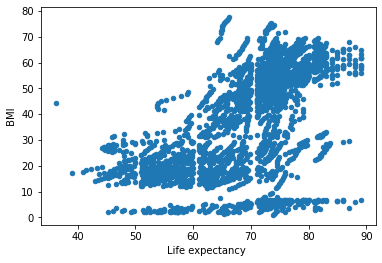

In [108]:
df.plot.scatter(x='Life expectancy ', y=' BMI ')

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

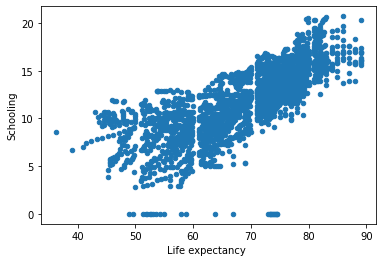

In [109]:
df.plot.scatter(x='Life expectancy ', y='Schooling')